In [1]:
! pip install nltk
! pip install pandas
! pip install scikit-learn


In [577]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from string import punctuation
from nltk import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /Users/guna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/guna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/guna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/guna/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [452]:
train_df = pd.read_csv('Dataset/train.csv')

In [453]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [480]:
%%capture
def data_cleanup(train_df):
    train_df['text'] = train_df['text'].str.lower()
    train_df['text'] = train_df['text'].str.strip()
    train_df['text'] = train_df['text'].replace(to_replace ='http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='\?*', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='(RT|rt)', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='@[a-z,_]*', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='([0-9]*:[0-9]*)', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='([0-9]*\.[0-9]*)', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='(utc|gmt)', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='_[\S]', value = '', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='&amp;?', value = 'and', regex = False)
    train_df['text'] = train_df['text'].replace(to_replace ='&lt;', value = '<', regex = False)
    train_df['text'] = train_df['text'].replace(to_replace ='&gt;', value = '>', regex = False)
    train_df['text'] = train_df['text'].replace(to_replace ='[ ]{2, }', value = ' ', regex = True)
    train_df['text'] = train_df['text'].replace(to_replace ='([^\w\d ]+)', value = '', regex = True)
    return train_df['text']

In [481]:
%%capture
train_df = pd.read_csv('Dataset/train.csv')
train_df['text'] = data_cleanup(train_df)

In [477]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this eahquake may ...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,the out of control wild fires in california ...,1
7610,10871,NaN,NaN,m 5km s of volcano hawaii,1
7611,10872,NaN,NaN,police investigating after an ebike collided w...,1


In [482]:
#Split training dataset
tweet_texts = train_df['text']
class_labels = train_df['target']
train_tweets, test_tweets, train_labels, test_labels = train_test_split(tweet_texts,class_labels,test_size=0.2, random_state=42, stratify=class_labels)

In [495]:
#Text Preprocessor
def preprocessing(text):
   word_lemma = []
   tweet_tokenize = TweetTokenizer()
   tokens = tweet_tokenize.tokenize((text).lower())
   tokens = [w for w in tokens if w not in punctuation and not w.isdigit() and not len(w) < 3]
   stop_words = stopwords.words ('english')
   tweet_without_stopwords = [t for t in tokens if t not in stop_words]
   text = " ".join (tweet_without_stopwords)
   word_lemma = [WordNetLemmatizer().lemmatize(t) for t in tweet_tokenize.tokenize(text)]
   pp_text = " ".join (word_lemma)
   return pp_text

In [599]:
def get_performance_score(actual_label : list, predicted_label : list):
    '''Function to calculate the performance metric using sklearn.
    
    Parameters
    ----------
    actual_label : list
      Actual(Ground Truth) class label from the dataset.
    predicted_label : pd.DataFrame
      Class label predicted by the model
    
    Return
    ------
    f1_score : float
    accuracy : float
    precision : float
    recall : float
    AUROC : float
    '''
    precision = metrics.precision_score(actual_label, predicted_label, pos_label=1)
    recall = metrics.recall_score(actual_label, predicted_label,pos_label=1)
    AUROC = metrics.roc_auc_score(actual_label, predicted_label)
    accuracy = metrics.accuracy_score(actual_label, predicted_label)
    f1_score = metrics.f1_score(actual_label, predicted_label,pos_label=1)
    confusion_mat = metrics.confusion_matrix(actual_label, predicted_label)
    metrics_list = [f1_score, accuracy, precision, recall, AUROC]
    metrics_list = pd.DataFrame(metrics_list).T
    metrics_df = metrics_list.rename(columns={0:'F1',1:'Accuracy',2:'Precision',3:'Recall',4:'AUROC'})
    return metrics_df, confusion_mat

In [621]:
def plot_confusion_matrix(confusion_mat, model_name):
    cm_plot = ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=['not_disaster','disaster'])
    title = model_name + " Confusion Matrix"
    cm_plot.plot(cmap=plt.cm.Greens)
    plt.title(title)
    plt.show()


## Variable definitions
 - train_tweets - Preprocessed tweets for training
 - test_tweets - Preprocessed tweets for testing
 - train_labels - class label for training tweets
 - test_labels - class label for test tweets

## Baseline
1. Implement traditional model(MultinomialNB, LogisticRegression, SVC, KNeighborsClassifier) from sklearn
2. Train and test the default model without tuning hyperparameter values
3. Use grid search(GridSearchCV) from sklearn to identify best values for hyperparameters
4. Train the model with best hypermeter values and test it on test set(test_tweets)

## BERTweet

In [ ]:
!pip install transformers
!pip install torch
!pip install datasets
!pip install evaluate
!pip install numpy
!pip install accelerate
!pip install emoji==0.6.0
!pip install torch torchvision torchaudio

In [558]:
from transformers import BertForSequenceClassification, AutoModelForSequenceClassification
from datasets import Dataset
from transformers import AutoTokenizer
from transformers import BertweetTokenizer
from transformers import AlbertTokenizer, AlbertModel
from transformers import AutoModel
from transformers import DataCollatorWithPadding
import evaluate
import numpy as np
from transformers import TrainingArguments, Trainer
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler,random_split
from transformers import AutoConfig
from sklearn import metrics

In [502]:
for index, row in train_df.iterrows():
        text = row['text']
        pp_text = preprocessing(text)
        train_df.at[index, 'text'] = pp_text

In [504]:
#Split training dataset
tweet_texts = train_df['text']
class_labels = train_df['target']
train_tweets, test_tweets, train_labels, test_labels = train_test_split(tweet_texts,class_labels,test_size=0.2, random_state=42, stratify=class_labels)

In [505]:
#Split training dataset
tweet_texts = train_tweets
class_labels = train_labels
train_tweets, dev_tweets, train_labels, dev_labels = train_test_split(tweet_texts,class_labels,test_size=0.2, random_state=42, stratify=class_labels)

In [506]:
train_cols = [pd.Series(train_tweets, name='text'), pd.Series(train_labels, name='labels')]
train_df = pd.concat(train_cols, axis = 1)
dev_cols = [pd.Series(dev_tweets, name='text'), pd.Series(dev_labels, name='labels')]
dev_df = pd.concat(dev_cols, axis = 1)
test_cols = [pd.Series(test_tweets, name='text'), pd.Series(test_labels, name='labels')]
test_df = pd.concat(test_cols,axis = 1)

In [509]:
model_name = "vinai/bertweet-base"
max_length = 32
trucate = True
padding='max_length'
batch_size = 32
mps_device = torch.device("mps")
id2text = {0: "not_disaster", 1: "disaster"}
text2id = {"not_disaster": 0, "disaster": 1}


In [ ]:
def tweet_tokenize(tweet_text):
    tokenizer = BertweetTokenizer.from_pretrained(model_name)
    IDs = tokenizer.encode_plus(
                            tweet_text, 
                            add_special_tokens = True, 
                            max_length = max_length, 
                            padding = padding,
                            truncation=trucate,
                            return_attention_mask = True,
                            return_tensors = 'pt'
                            )
    return IDs

In [ ]:
def mapping(input_ids, attention_masks, token_type_ids, label):
    map_dict = {}
    map_dict['input_ids'] = input_ids
    map_dict['token_type_ids'] = token_type_ids
    map_dict['attention_mask'] = attention_masks
    return map_dict, label 


In [212]:
def build_ds(input_df):
    input_ids_list = []
    token_type_ids_list = []
    attention_mask_list = []
    label_list = []
        
    # for text, label in input_df:
    for index, row in input_df.iterrows():
        text = row['text']
        label = row['labels']
        classifier_input = tweet_tokenize(text)
        input_ids_list.append(classifier_input['input_ids'])
        token_type_ids_list.append(classifier_input['token_type_ids'])
        attention_mask_list.append(classifier_input['attention_mask'])
        label_list.append([label])
    input_ids = torch.cat(input_ids_list, dim=0)
    attention_masks = torch.cat(attention_mask_list, dim=0)
    token_type_ids = torch.cat(token_type_ids_list, dim=0)
    labels = torch.tensor(label_list)
    mapped_dataset = TensorDataset(input_ids, attention_masks,token_type_ids, labels)
    return mapped_dataset

In [ ]:
train_dataset_mapped = build_ds(train_df.head(n=1000))
dev_dataset_mapped = build_ds(dev_df.head(n=1000))

In [562]:
tokenizer = BertweetTokenizer.from_pretrained(model_name)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
classifier = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2, id2label=id2text, label2id=text2id)
classifier = classifier.to(mps_device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [547]:
def preprocessor(input):
     token_ids_dict = tokenizer.encode_plus(input['text'], add_special_tokens = True, padding=padding, max_length=max_length, truncation=trucate,return_attention_mask = True)
     token_ids_dict['label'] = input['labels']
     # print(token_ids_dict)
     return token_ids_dict

In [563]:
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(dev_df)
test_dataset = Dataset.from_pandas(test_df)
train_map = train_dataset.map(preprocessor)
dev_map = eval_dataset.map(preprocessor)
test_map = test_dataset.map(preprocessor)

Map: 100%|██████████| 1523/1523 [00:00<00:00, 6030.84 examples/s]


In [513]:
f1 = evaluate.load("f1")
def calculate_f1(labels):
    predicted, actual = labels
    predicted = np.argmax(predicted, axis=1)
    return f1.compute(predictions=predicted, references=actual)

In [564]:
training_args = TrainingArguments(
    output_dir="trainer_cache",
    overwrite_output_dir=True,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model = 'f1',
    greater_is_better=True,
    num_train_epochs=8,
    learning_rate = 1e-5,
    adam_epsilon = 1e-5,
    weight_decay = 1e-5,
    adafactor = False,
    use_mps_device=True

)

trainer = Trainer(
    model=classifier,
    args=training_args,
    train_dataset=train_map,
    eval_dataset=dev_map,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=calculate_f1,
)

/Users/guna/anaconda3/envs/detect-disaster/lib/python3.12/site-packages/transformers/training_args.py:2046: UserWarning: `use_mps_device` is deprecated and will be removed in version 5.0 of 🤗 Transformers. `mps` device will be used by default if available similar to the way `cuda` device is used.Therefore, no action from user is required. 
  warnings.warn(


In [565]:
trainer.train()

 10%|█         | 501/4872 [01:22<11:54,  6.12it/s]

{'loss': 0.5093, 'grad_norm': 3.111316442489624, 'learning_rate': 8.973727422003284e-06, 'epoch': 0.82}


 12%|█▎        | 609/4872 [01:46<11:28,  6.19it/s]

{'eval_loss': 0.4299132525920868, 'eval_f1': 0.7936507936507936, 'eval_runtime': 6.1221, 'eval_samples_per_second': 198.952, 'eval_steps_per_second': 24.992, 'epoch': 1.0}


 21%|██        | 1001/4872 [02:54<10:19,  6.25it/s] 

{'loss': 0.4411, 'grad_norm': 19.835969924926758, 'learning_rate': 7.947454844006569e-06, 'epoch': 1.64}


 25%|██▌       | 1218/4872 [03:34<09:46,  6.22it/s]

{'eval_loss': 0.4644637107849121, 'eval_f1': 0.7913533834586466, 'eval_runtime': 4.0723, 'eval_samples_per_second': 299.091, 'eval_steps_per_second': 37.571, 'epoch': 2.0}


 31%|███       | 1501/4872 [04:22<09:06,  6.17it/s]  

{'loss': 0.3926, 'grad_norm': 2.905473232269287, 'learning_rate': 6.9211822660098524e-06, 'epoch': 2.46}


 38%|███▊      | 1827/4872 [05:18<08:16,  6.14it/s]

{'eval_loss': 0.45878612995147705, 'eval_f1': 0.7947686116700201, 'eval_runtime': 4.0093, 'eval_samples_per_second': 303.79, 'eval_steps_per_second': 38.161, 'epoch': 3.0}


 41%|████      | 2001/4872 [05:49<07:52,  6.07it/s]  

{'loss': 0.3785, 'grad_norm': 16.378162384033203, 'learning_rate': 5.894909688013136e-06, 'epoch': 3.28}


 50%|█████     | 2436/4872 [07:03<06:35,  6.16it/s]

{'eval_loss': 0.592811644077301, 'eval_f1': 0.7973609802073516, 'eval_runtime': 4.0789, 'eval_samples_per_second': 298.61, 'eval_steps_per_second': 37.51, 'epoch': 4.0}


 51%|█████▏    | 2501/4872 [07:16<06:25,  6.16it/s]  

{'loss': 0.3344, 'grad_norm': 0.3206090033054352, 'learning_rate': 4.868637110016421e-06, 'epoch': 4.11}


 62%|██████▏   | 3001/4872 [08:38<05:09,  6.05it/s]

{'loss': 0.3096, 'grad_norm': 33.72257995605469, 'learning_rate': 3.842364532019705e-06, 'epoch': 4.93}


 62%|██████▎   | 3045/4872 [08:49<04:56,  6.16it/s]

{'eval_loss': 0.6568858027458191, 'eval_f1': 0.790009250693802, 'eval_runtime': 4.0438, 'eval_samples_per_second': 301.205, 'eval_steps_per_second': 37.836, 'epoch': 5.0}


 72%|███████▏  | 3501/4872 [10:05<03:42,  6.15it/s]  

{'loss': 0.2709, 'grad_norm': 26.653905868530273, 'learning_rate': 2.8160919540229887e-06, 'epoch': 5.75}


 75%|███████▌  | 3654/4872 [10:33<03:21,  6.05it/s]

{'eval_loss': 0.7191347479820251, 'eval_f1': 0.7928772258669166, 'eval_runtime': 4.0613, 'eval_samples_per_second': 299.905, 'eval_steps_per_second': 37.673, 'epoch': 6.0}


 82%|████████▏ | 4001/4872 [11:32<02:20,  6.19it/s]

{'loss': 0.2652, 'grad_norm': 13.423952102661133, 'learning_rate': 1.7898193760262728e-06, 'epoch': 6.57}


 88%|████████▊ | 4263/4872 [12:18<01:38,  6.16it/s]

{'eval_loss': 0.7972370386123657, 'eval_f1': 0.7864963503649635, 'eval_runtime': 4.0566, 'eval_samples_per_second': 300.25, 'eval_steps_per_second': 37.716, 'epoch': 7.0}


 92%|█████████▏| 4501/4872 [12:59<00:59,  6.21it/s]

{'loss': 0.2325, 'grad_norm': 0.1778857260942459, 'learning_rate': 7.635467980295568e-07, 'epoch': 7.39}


100%|██████████| 4872/4872 [14:03<00:00,  6.18it/s]

{'eval_loss': 0.7777602076530457, 'eval_f1': 0.7888372093023256, 'eval_runtime': 4.1646, 'eval_samples_per_second': 292.468, 'eval_steps_per_second': 36.739, 'epoch': 8.0}


100%|██████████| 4872/4872 [14:06<00:00,  5.76it/s]

{'train_runtime': 846.0799, 'train_samples_per_second': 46.067, 'train_steps_per_second': 5.758, 'train_loss': 0.3411858719949456, 'epoch': 8.0}


TrainOutput(global_step=4872, training_loss=0.3411858719949456, metrics={'train_runtime': 846.0799, 'train_samples_per_second': 46.067, 'train_steps_per_second': 5.758, 'total_flos': 640938530856960.0, 'train_loss': 0.3411858719949456, 'epoch': 8.0})

In [619]:
actual_label = test_df['labels']
predictions_prob = trainer.predict(test_map)
predictions =  predictions_prob.predictions
predictions = np.argmax(predictions,axis=1)
predicted_lables = np.array(predictions, dtype = int)
actual_labels = np.array(actual_label, dtype = int)
metrics_df, confusion_mat = get_performance_score(actual_labels, predicted_lables)

100%|██████████| 191/191 [00:05<00:00, 37.64it/s]


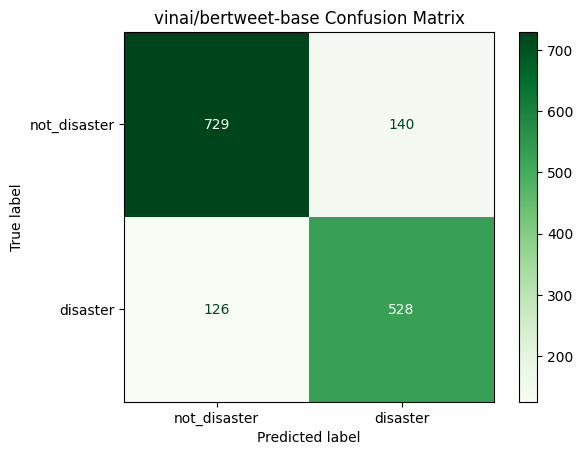

In [623]:
plot_confusion_matrix(confusion_mat, model_name)

In [568]:
trainer.save_model(output_dir = 'model/bertweet/')